In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Label File
pd.read_csv(r'C:\Users\DHANUSHVARDAN\Desktop\esdandiot\driver_imgs_list.csv')

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [3]:
# Loading ImageDataGenrator
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# Making an object of ImageData Genrator
imageGen = ImageDataGenerator(rescale=1.0/255)

In [5]:
# Getting Training Genrator 
train_gen=imageGen.flow_from_directory(r"C:\Users\DHANUSHVARDAN\Desktop\esdandiot\imgs\train",
    batch_size=32,
    target_size=(100,100),
    class_mode = 'categorical',
)

Found 22424 images belonging to 10 classes.


# Making our CNN Model

In [6]:
# Making our CNN Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape =(100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [7]:
# Fitting our model
model.fit_generator(train_gen,epochs=10)

<ipython-input-7-c157abf6f5e3>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen,epochs=10)


Epoch 1/10
701/701 [==============================] - 327s 464ms/step - loss: 0.4182 - accuracy: 0.8626
Epoch 2/10
701/701 [==============================] - 311s 444ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 3/10
701/701 [==============================] - 308s 439ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 4/10
701/701 [==============================] - 310s 443ms/step - loss: 0.0123 - accuracy: 0.9966
Epoch 5/10
701/701 [==============================] - 309s 441ms/step - loss: 0.0161 - accuracy: 0.9957
Epoch 6/10
701/701 [==============================] - 306s 436ms/step - loss: 0.0186 - accuracy: 0.9947
Epoch 7/10
701/701 [==============================] - 306s 436ms/step - loss: 0.0087 - accuracy: 0.9980
Epoch 8/10
701/701 [==============================] - 307s 438ms/step - loss: 0.0162 - accuracy: 0.9951
Epoch 9/10
701/701 [==============================] - 310s 442ms/step - loss: 0.0078 - accuracy: 0.9979
Epoch 10/10
701/701 [==============================] - 314s 448m

In [7]:
# Making an object of ImageData Genrator
imageGen = ImageDataGenerator(rescale=1.0/255)

# Making Test Folder For ImageDataGenerator

In [8]:
# Making a test directory in output folder ( that can be readable and writeable )
import os
os.mkdir('./test')
os.mkdir('./test/all_classes')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './test'

In [9]:
# Importing copyfile so copy the testing images from the input test folder to ouput test folder
from shutil import copyfile

In [10]:
# Copying from the input test folder to ouput test folder
d = pd.read_csv('../sample_submission.csv')
for row in d.values:
    file_name = row[0]
    copyfile( '../imgs/test/'+file_name , './test/all_classes/'+file_name )

In [11]:
# Getting Testing Genrator 
test_gen=imageGen.flow_from_directory(
    './test',
    class_mode=None,
    shuffle=False,
    target_size=(100,100),
)

Found 79726 images belonging to 1 classes.


In [12]:
# Predicting from test Genrator 
test_gen.reset()
predictions = model.predict_generator(test_gen,verbose=1)

<ipython-input-12-b2f64e35b774>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_gen,verbose=1)


2492/2492 [==============================] - 1212s 486ms/step


In [13]:
# Checking the shape of prediction
predictions.shape

(79726, 10)

In [14]:
# Converting the Prediction same as sample submission dataFrame
# Making the dictionary of The Predcition
d1 = pd.read_csv('../sample_submission.csv')
d ={
    'img':list(d1.values[:,0]),
}
for i in range(0,10):
    d['c' + str(i)] = list(predictions[:,i])
d

{'img': ['img_1.jpg',
  'img_10.jpg',
  'img_100.jpg',
  'img_1000.jpg',
  'img_100000.jpg',
  'img_100001.jpg',
  'img_100002.jpg',
  'img_100003.jpg',
  'img_100004.jpg',
  'img_100005.jpg',
  'img_100007.jpg',
  'img_100008.jpg',
  'img_100009.jpg',
  'img_10001.jpg',
  'img_100010.jpg',
  'img_100011.jpg',
  'img_100012.jpg',
  'img_100013.jpg',
  'img_100014.jpg',
  'img_100016.jpg',
  'img_100017.jpg',
  'img_100018.jpg',
  'img_100019.jpg',
  'img_10002.jpg',
  'img_100020.jpg',
  'img_100022.jpg',
  'img_100023.jpg',
  'img_100024.jpg',
  'img_100025.jpg',
  'img_100028.jpg',
  'img_100030.jpg',
  'img_100031.jpg',
  'img_100032.jpg',
  'img_100033.jpg',
  'img_100034.jpg',
  'img_100035.jpg',
  'img_100037.jpg',
  'img_100038.jpg',
  'img_100039.jpg',
  'img_10004.jpg',
  'img_100040.jpg',
  'img_100042.jpg',
  'img_100043.jpg',
  'img_100044.jpg',
  'img_100047.jpg',
  'img_100049.jpg',
  'img_10005.jpg',
  'img_100051.jpg',
  'img_100052.jpg',
  'img_100053.jpg',
  'img_1000

In [15]:
# Converting the Prediction to DataFrame
df = pd.DataFrame(d)
df

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.094607,0.084710,0.106150,0.085489,0.100350,0.083276,0.123316,0.104504,0.113579,0.104018
1,img_10.jpg,0.085944,0.091438,0.107659,0.087725,0.097117,0.095936,0.125906,0.098716,0.112792,0.096765
2,img_100.jpg,0.099674,0.089707,0.094246,0.081909,0.103926,0.086858,0.120271,0.105622,0.116832,0.100955
3,img_1000.jpg,0.094461,0.088397,0.108139,0.083751,0.095961,0.090517,0.126349,0.104652,0.116110,0.091664
4,img_100000.jpg,0.091046,0.086771,0.113020,0.089440,0.097026,0.093389,0.112454,0.106112,0.117832,0.092911
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,0.096611,0.088221,0.104517,0.088047,0.096406,0.089533,0.113049,0.096539,0.125196,0.101881
79722,img_99995.jpg,0.088508,0.089763,0.103657,0.081512,0.094732,0.096839,0.124444,0.103064,0.121854,0.095627
79723,img_99996.jpg,0.093189,0.087776,0.102800,0.091749,0.093929,0.086461,0.123514,0.107049,0.116679,0.096853
79724,img_99998.jpg,0.093228,0.090166,0.102917,0.080407,0.093069,0.090406,0.127945,0.104188,0.116960,0.100714


In [16]:
# Converting DataFrame into CSV File
df.to_csv('./Prediction.csv',index=False)

In [17]:
# Getting Classes from Predictions
predicted_class_indices=np.argmax(predictions,axis=1)
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions_in_class = [labels[k] for k in predicted_class_indices]


In [18]:
predictions_in_class

['c6',
 'c6',
 'c6',
 'c6',
 'c8',
 'c6',
 'c6',
 'c8',
 'c6',
 'c8',
 'c6',
 'c6',
 'c6',
 'c8',
 'c6',
 'c6',
 'c8',
 'c6',
 'c6',
 'c6',
 'c8',
 'c8',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c8',
 'c6',
 'c8',
 'c8',
 'c6',
 'c8',
 'c8',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c8',
 'c6',
 'c6',
 'c8',
 'c8',
 'c8',
 'c6',
 'c8',
 'c6',
 'c6',
 'c6',
 'c6',
 'c8',
 'c8',
 'c8',
 'c8',
 'c8',
 'c6',
 'c8',
 'c8',
 'c8',
 'c8',
 'c8',
 'c6',
 'c8',
 'c6',
 'c8',
 'c8',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c8',
 'c8',
 'c6',
 'c8',
 'c8',
 'c6',
 'c8',
 'c8',
 'c8',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c8',
 'c6',
 'c8',
 'c6',
 'c6',
 'c6',
 'c8',
 'c8',
 'c8',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c6',
 'c8',
 'c6',
 'c6',
 'c8',
 'c8',
 'c8',
 'c8',
 'c8',
 'c6',
 'c8',
 'c8',
 'c6',
 'c8',
 'c8',
 'c6',
 'c6',
 'c8',
 'c8',
 'c6',
 'c6',
 'c8',
 'c6',
 'c6',
 'c6',
 'c8',
 'c6',
 'c8',
 'c8',
 'c8',
 'c8',
 'c6',
 'c6',
 'c8',
 'c6',
 'c6',
 'c8',
 'c6',
 'c8',

In [19]:
filenames=test_gen.filenames

In [20]:
filenames

['all_classes\\img_1.jpg',
 'all_classes\\img_10.jpg',
 'all_classes\\img_100.jpg',
 'all_classes\\img_1000.jpg',
 'all_classes\\img_100000.jpg',
 'all_classes\\img_100001.jpg',
 'all_classes\\img_100002.jpg',
 'all_classes\\img_100003.jpg',
 'all_classes\\img_100004.jpg',
 'all_classes\\img_100005.jpg',
 'all_classes\\img_100007.jpg',
 'all_classes\\img_100008.jpg',
 'all_classes\\img_100009.jpg',
 'all_classes\\img_10001.jpg',
 'all_classes\\img_100010.jpg',
 'all_classes\\img_100011.jpg',
 'all_classes\\img_100012.jpg',
 'all_classes\\img_100013.jpg',
 'all_classes\\img_100014.jpg',
 'all_classes\\img_100016.jpg',
 'all_classes\\img_100017.jpg',
 'all_classes\\img_100018.jpg',
 'all_classes\\img_100019.jpg',
 'all_classes\\img_10002.jpg',
 'all_classes\\img_100020.jpg',
 'all_classes\\img_100022.jpg',
 'all_classes\\img_100023.jpg',
 'all_classes\\img_100024.jpg',
 'all_classes\\img_100025.jpg',
 'all_classes\\img_100028.jpg',
 'all_classes\\img_100030.jpg',
 'all_classes\\img_10003

In [21]:
filenames=test_gen.filenames
file=[]
for f in filenames:
    file.append(f.split('\\')[1])
results=pd.DataFrame({"Filename":file ,
                      "Predictions":predictions_in_class})
results

,Filename,Predictions
0,img_1.jpg,c6
1,img_10.jpg,c6
2,img_100.jpg,c6
3,img_1000.jpg,c6
4,img_100000.jpg,c8
...,...,...
79721,img_99994.jpg,c8
79722,img_99995.jpg,c6
79723,img_99996.jpg,c6
79724,img_99998.jpg,c6


In [65]:
# # Random Image of Testing Data
# from IPython.display import Image
# Image(filename='../imgs/test/img_32463.jpg') 

In [66]:
# # Predicting the class of Image
# results.loc[results['Filename'] == 'img_100162.jpg']


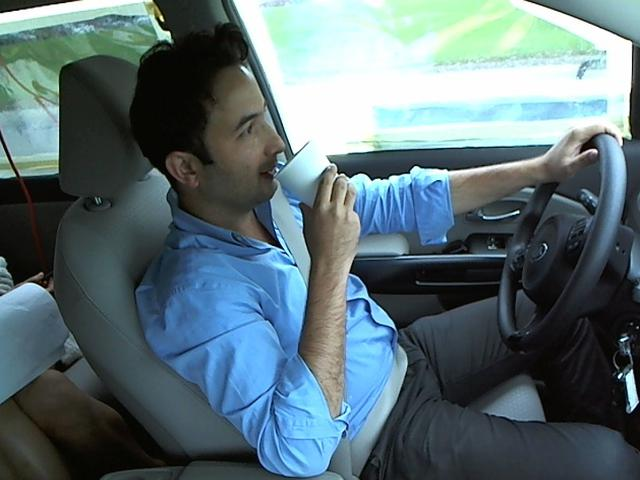

In [71]:
# Random Image of Testing Data
from IPython.display import Image
Image(filename='../imgs/test/img_110.jpg') 

In [72]:
# Predicting the class of Image
results.loc[results['Filename'] == 'img_110.jpg']


,Filename,Predictions
2567,img_110.jpg,c6
